0        2013-01-01 01:00:00+00:00
1        2013-01-01 01:15:00+00:00
2        2013-01-01 01:30:00+00:00
3        2013-01-01 01:45:00+00:00
4        2013-01-01 02:00:00+00:00
                    ...           
140739   2017-10-23 01:45:00+00:00
140740   2017-10-23 02:00:00+00:00
140741   2017-10-23 02:15:00+00:00
140742   2017-10-23 02:30:00+00:00
140743   2017-10-23 02:45:00+00:00
Name: Timestamp, Length: 140744, dtype: datetime64[ns, UTC]


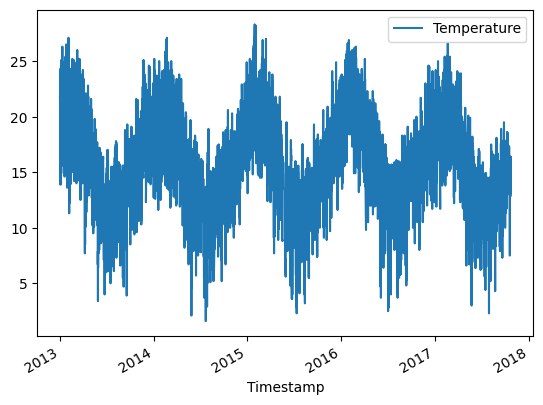

      obs_id  SiteId                 Timestamp  ForecastId         Value   
1    1855136       6 2013-01-01 01:15:00+00:00          43  25062.047878  \
2    5379308       6 2013-01-01 01:30:00+00:00          43  25015.722466   
3    1204858       6 2013-01-01 01:45:00+00:00          43  24969.397055   
4     167176       6 2013-01-01 02:00:00+00:00          43  24923.071643   
5    1417840       6 2013-01-01 02:15:00+00:00          43  24992.559760   
..       ...     ...                       ...         ...           ...   
96   4414228       6 2013-01-02 01:00:00+00:00          43  25201.024114   
97   7679920       6 2013-01-02 01:15:00+00:00          43  24946.234349   
98   3636173       6 2013-01-02 01:30:00+00:00          43  24691.444583   
99   2507416       6 2013-01-02 01:45:00+00:00          43  24784.095407   
100  4975213       6 2013-01-02 02:00:00+00:00          43  24876.746231   

         UnixTS  Temperature          C(J)        C(J-1)  T(J)  T(J-1)   
1    13570029

In [69]:
import pandas
import matplotlib.pyplot as plt

site_id = 6

weather = pandas.read_csv(f"site_{site_id}_weather_post.csv", sep=";", parse_dates=['Timestamp'])
consumption = pandas.read_csv(f"site_{site_id}_consumption_post.csv", sep=";", parse_dates=['Timestamp'])

print(consumption["Timestamp"])
consumption.plot(x="Timestamp", y=["Temperature"])
#consumption.plot(x="Temperature", y="Value")

consumption["C(J)"] = consumption["Value"]
consumption["C(J-1)"] = consumption["Value"].shift(periods=1)

consumption["T(J)"] = consumption["Temperature"]
consumption["T(J-1)"] = consumption["Temperature"].shift(periods=1)

consumption = consumption.drop([0])

consumption["deltaT(J)"] = consumption["T(J)"] - consumption["T(J-1)"] 
consumption["deltaC(J)"] = consumption["C(J)"] - consumption["C(J-1)"] 

figure2 = consumption.plot(x="deltaT(J)", y="deltaC(J)")
plt.figure().show() 

#weather = pandas.read_csv(f"site_{site_id}_weather.csv", sep=";", parse_dates=['Timestamp'])

print(consumption.head(100))
print(consumption["Temperature"].max())
